In [1]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import talib as tl 
from matplotlib import style

plt.style.use('dark_background')
#plt.style.use('default')

start_date = "2015-10-27"
end_date = "2022-08-02"
stock1 = "AAPL"
df = yf.download([stock1], start = start_date, end = end_date)
#print('data fields downloaded:', set(df.columns.get_level_values(0)))

rs = pd.DataFrame()

[*********************100%***********************]  1 of 1 completed


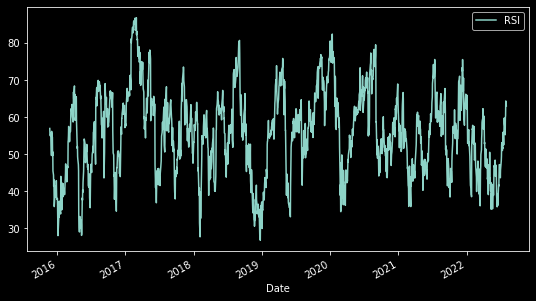

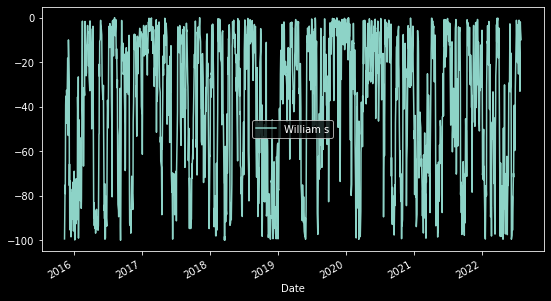

In [2]:
#---------------- RELATIVE STRENGTH --------------------
# The Relative Strength Index

rs['RSI'] = ta.rsi(df['Close'],20)
rs[['RSI']].plot(figsize=(9,5))
plt.show()

# William's Percent R is a momentum oscillator similar to the RSI that attempts to identify overbought and oversold conditions.
rs['William s'] = ta.willr(df['High'],df['Low'], df['Close'])
rs[['William s']].plot(figsize=(9,5))
plt.show()
#--------------------------------------------

In [3]:
rs.shape

(1702, 2)

In [4]:
rs = rs.replace('?', np.nan)
rs.isnull().sum()

RSI          20
William s    13
dtype: int64

In [5]:
def fill_missing(values):
    one_day = 60*24
    for row in range(rs.shape[0]):
        for col in range(rs.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
rs = rs.astype('float32')
fill_missing(rs.values)
rs.isnull().sum()

RSI          0
William s    0
dtype: int64

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA model with number of components desired
pca = PCA(n_components=1)
# Fit PCA model to the data and transform it
X_transformed = pca.fit_transform(rs)

# The transformed data now has only 1 features
print(X_transformed.shape)

(1702, 1)


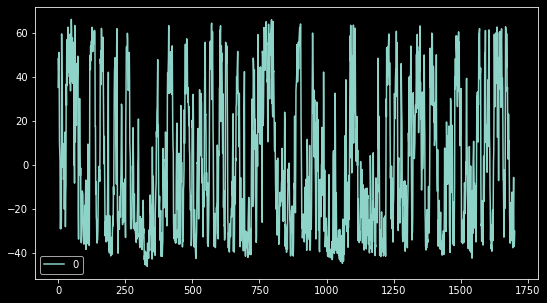

In [7]:
x = pd.DataFrame(X_transformed)
x.plot(figsize=(9,5))
plt.show()